# RIT DSCI-633: Foundations of Data Science and Analytics
## Assignment 1
### Due: 11:59 pm EST, Saturday, Oct 2, 2021

### Problem 1 (10 points)

In statistics and probability theory, the law of large numbers is a theorem that describes the result of
repeating the same experiment a large number of times. The theorem states that if the same
experiment or study is repeated independently a large number of times, the average of the results of
the trials must be close to the expected value. The result becomes closer to the expected value as the
number of trials is increased. Let us look at a specific experiment.

Assume you have a Gaussian distribution (commonly called a “bell curve”) with mean µ and std
deviation σ. The area under the curve that lies between σ and 2σ, and –σ and -2σ is approximately
27.2%. In other words, approximately 27.2% of numbers generated randomly using this distribution will
fall in the range [µ + σ, µ + 2σ] or [µ - 2σ, µ - σ], as shown below.

Generate N random numbers that follow a Gaussian distribution with µ = 100, σ = 10, and count the
numbers M that fall into the ranges above. Print the fraction M/N. Repeat this for N = 10, 100, 1000,
10000, and 1000000.

Does the fraction start to approach 27.2%?


#### References:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

### Solution

In [1]:
import numpy as np

def law_of_large_numbers(mu,sigma,N_values):
    '''
    mu: the mean of the normal distribution
    sigma: the standard deviation of the normal distribution
    N_Values: the values of N for which the samples are to be generated.
    '''
    
    for val in N_values:
        # Getting the random sample from the gaussian distribution with the specified mean and standard deviation
        N = np.random.normal(mu,sigma,val)
        
        # Defining the bounds under which the area has to be assessed.
        neg_lower_range = mu - 2 * sigma
        neg_upper_range = mu - sigma
        pos_lower_range = mu + sigma
        pos_upper_range = mu + 2 * sigma
        
        # Setting the counter of M values to 0
        M = 0
        
        # For each sample, if it lies between one and two standard deviations of mean on either side of it, then increment M  
        for sample in N:
            if neg_lower_range <= sample <= neg_upper_range or pos_lower_range <= sample <= pos_upper_range:
                M+=1
        
        # Print the fraction for each N as a percentage
        print(f'The fraction M/N for N={val} = {M/len(N)*100:.2f} %')
        
# Mean is 100 and standard deviation 10.    
mu,sigma = 100,10

# Experiment to be repeated for below values of N 
N_values = [10,100,1000,10000,1000000]

# Function call
law_of_large_numbers(mu,sigma,N_values)

print('As evident from the above results, the fraction indeed approaches 27.2% ')

The fraction M/N for N=10 = 20.00 %
The fraction M/N for N=100 = 22.00 %
The fraction M/N for N=1000 = 25.50 %
The fraction M/N for N=10000 = 27.41 %
The fraction M/N for N=1000000 = 27.19 %
As evident from the above results, the fraction indeed approaches 27.2% 


<font color = 'green'> Correct  : 10 points </font> 

### Problem 2 (5 points)

Imagine you have a dataset of movie ratings for a set of 500 popular movies and a set of 1000 users.
Each data sample contains the ratings of each movie (from 1 to 5 stars) by a specific user. The rating is
an integer in the range [0,5], with a value of 0 means that the user did not watch that movie.
How would you convert this data to a form suitable for association analysis? In particular, what type of
attributes would you have and how many of them?



#### References
https://en.wikipedia.org/wiki/Collaborative_filtering <br>
https://www.youtube.com/watch?v=8wLKuscyO9I

### Solution

(i) One of the observations that can be made from the data is that the dataset is not raw, but it is pre-processed. The reason behind this is that for eg: if the user 1 did not watch the movie A, then it means that the value should be null for the movie A attribute of the user 1 data sample. However, according to the problem statement it is 0, which means that the null values are imputed with 0. <br>
(ii) We have to convert this dataset to a form suitable for association analysis. Which means that we have to recommend movies to users based on their preferences and their earlier viewing history. <br>
(iii) Another way to think of and redefine this problem is from point (i) that if the user 1 watches movie A, then what rating will he/she give to the movie A (current rating is 0 since it is not watched) based on the earlier ratings given by user 1 to the other movies of the same type as movie A as well as other users with similar preferences to user 1 (dependencies)? We can then replace the value 0 with this predicted value and if this value is more than a particular threshold (let's say 4 or more), then we can assume that the user 1 will like this movie A. So, then we can add movie A to the list of recommendations for <br>user 1. This technique is known as **collaborative filtering**. <br>
(iv) The type of attributes which can be used are discrete, qualitative and nominal. These are the attributes that can be mapped to the users(instances) and movies(features). The number of attributes that are used in case of movie recommender systems are usually the number of unique genres (Action, Sci-fi, Classic etc) of the 500 movies. <br>
(v) **Note:** A movie may belong to one or more than one genre. A user can like/dislike one or more than one genre. So the genre  can be associated to both movies and users. These features are called latent features. <br>
(vi) The way this process can work is that we take the given dataset of 1000 rows and 500 columns (let's call it R) and run Principal Component Analysis by specifying the number of dimensions as the number of unique genres so that it can reduce the dimensionality while preserving the maximum variance. This will associate users with the genre and give each user's interest in the various genres. Let's call this U <br>
(vii) To associate movies with the genres, we repeat the same PCA process by transposing the dataset making the movies as rows and users as columns. Let's call this M. This technique is called **singular valued decomposition (SVD)** where we are factorizing the matrix R into M and U. <br>
(viii) We can now reconstruct the matrix R as follows: $R = M\sum U^{T} $ where $\sum$ is the diagonal matrix of eigen vectors used for scaling. If we want to predict a rating in place of 0, we can simply take the dot product of the corresponding row in M for the user and the column in $ U^{T} $ for the movie. If this rating prediction is 4 or more, we recommend the movie to the user.

<font color = 'red'> Incorrect : 0 points </font> 
For association analysis, we require binary asymmetric attributes.

Since each rating can take 6 possible values, we would need to replace it with 6 asymmetric binary attributes
of the form (rating == 0?) (rating == 1?) ...

This will give us 500 x 6 = **3000 binary attributes per user**.  
The resulting sparse data matrix would be **1000 rows x 3000 columns**.

### Problem 3 (5 points)

Distinguish between noise and outliers

1. True or False ? Noise may be in the form of noisy attribute values, or noise objects.
2. True or False ? Noise is sometimes desirable.
3. True or False ? Outliers are sometimes desirable.
4. True or False ? Noise objects may or may not be outliers. Explain your reasoning.
5. True or False ? Outlier objects may or may not be noise. Explain your reasoning.

#### References:
Lecture Slides

### Solution

1. True <br><br>

2. False <br><br>

3. True <br> <br>

4. True: Noise objects may or may not be outliers. For eg: If there is a sensor which measures atmospheric pressure. In a particular region, the usual pressure values can be measured and visualized. However, if there is a **malfunction in the sensor**, then for the same region, it will measure pressure values which are nowhere close to the usual ones. In this case, the noisy values are outliers at the data sample level. At the attribute level, noise tends to distort the original values. For eg, **a hazy signal** is captured by an electrical instrument. In this case, the noise is not an outlier but is mixed with the desirable data values. In general, noise and outliers are not mutually exclusive. <br><br>  

5. True: Outlier objects may or may not be noise. For eg: In case of **anomaly detection** problems like Credit card fraud detection or network attack detection, the goal of the analysis is to find these outliers to model the unusual scenarios. In such cases, the outliers are legitimate and not noise. But, there might be a scenario where an unusual value/outlier is recorded in the data while data collection which might just be due to **human error**. In this case, the outlier does not represent any exceptional scenario but is mere noise. In general, noise and outliers are not mutually exclusive.<br>

<font color = 'green'> Correct : 5 points </font>

### Problem 4 (20 points)
Download the ‘Diamonds’ dataset from https://www.kaggle.com/shivam2503/diamonds.
1. Based on the description of the dataset provided at the site, categorize each attribute of the data as
discrete or continuous, qualitative (nominal or ordinal), or quantitative (interval or ratio)  (5 points)
e.g. Age in years: Discrete, Quantitative, Ratio.
2. Load the CSV data file into a Pandas DataFrame object and display the first 5 rows. (2 points)
3. Calculate summary statistics:
a. For each quantitative attribute: find the mean, median, standard deviation, and range. (3.5 points)
b. For each qualitative attribute, find the mode. (1.5 points)
c. Find the Interquartile Range (IQR) of the ‘price’ variable. (0.5 points)
4. What fraction of the data samples have ‘cut’ that is ‘very good’ or better ? Create a bar plot
showing the distribution of the data samples by ‘cut’ (one bar for each value of cut). (2.5 points)
5. Plot a histogram of the 'carat' variable. (2 points)
6. Plot a scatter plot of ‘carat’ vs ‘price’. (2 points)
7. Compute the correlation between ‘carat’ and ‘price’. (1 point)

#### References:
https://pandas.pydata.org/pandas-docs/stable/ <br>
https://matplotlib.org/

### Solution

#### Solution 4.1

**price**: Continuous, Quantitative, Ratio (monetary quantity)<br>
**carat**: Continuous, Quantitative, Ratio (measurement)<br>
**cut**: Discrete, Qualitative, Ordinal (value of cut varies from Fair to Ideal)<br> 
**color**: Discrete, Qualitative, Ordinal (value varies from J to D)<br>
**clarity**: Discrete, Qualitative, Ordinal (value varies from I1 to IF)<br>
**x**: Continuous, Quantitative, Ratio (measurement)<br>
**y**: Continuous, Quantitative, Ratio (measurement)<br>
**z**: Continuous, Quantitative, Ratio (measurement)<br>
**depth**: Continuous, Quantitative, Ratio (measurement)<br>
**table** : Continuous, Quantitative, Ratio (measurement)

<font color = 'green'> Correct : 5 points </font> 

#### Solution 4.2

In [2]:
# Importing pandas library
import pandas as pd

# Importing the dataset into diamonds dataframe
diamonds_df = pd.read_csv('C:\\Users\\astth\\Downloads\\diamonds.csv')

# Displaying the first five rows of the dataset.
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<font color = 'green'> Correct : 2 points </font> 

#### Solution 4.3

In [3]:
# Quantitative attributes
print(f'For price, mean = {diamonds_df.price.mean()}, median = {diamonds_df.price.median()}, standard deviation = {diamonds_df.price.std()}, range = {diamonds_df.price.max()-diamonds_df.price.min()}\n')
print(f'For carat, mean = {diamonds_df.carat.mean()}, median = {diamonds_df.carat.median()}, standard deviation = {diamonds_df.carat.std()}, range = {diamonds_df.carat.max()-diamonds_df.carat.min()}\n')
print(f'For x, mean = {diamonds_df.x.mean()}, median = {diamonds_df.x.median()}, standard deviation = {diamonds_df.x.std()}, range = {diamonds_df.x.max()-diamonds_df.x.min()}\n') 
print(f'For y, mean = {diamonds_df.y.mean()}, median = {diamonds_df.y.median()}, standard deviation = {diamonds_df.y.std()}, range = {diamonds_df.y.max()-diamonds_df.y.min()}\n')
print(f'For z, mean = {diamonds_df.z.mean()}, median = {diamonds_df.z.median()}, standard deviation = {diamonds_df.z.std()}, range = {diamonds_df.z.max()-diamonds_df.z.min()}\n') 
print(f'For depth, mean = {diamonds_df.depth.mean()}, median = {diamonds_df.depth.median()}, standard deviation = {diamonds_df.depth.std()}, range = {diamonds_df.depth.max()-diamonds_df.depth.min()}\n') 
print(f'For table, mean = {diamonds_df.table.mean()}, median = {diamonds_df.table.median()}, standard deviation = {diamonds_df.table.std()}, range = {diamonds_df.table.max()-diamonds_df.table.min()}\n') 

For price, mean = 3932.799721913237, median = 2401.0, standard deviation = 3989.4397381463023, range = 18497

For carat, mean = 0.7979397478679852, median = 0.7, standard deviation = 0.47401124440538067, range = 4.81

For x, mean = 5.731157211716609, median = 5.7, standard deviation = 1.1217607467924422, range = 10.74

For y, mean = 5.734525954764462, median = 5.71, standard deviation = 1.1421346741235396, range = 58.9

For z, mean = 3.5387337782723316, median = 3.53, standard deviation = 0.7056988469499964, range = 31.8

For depth, mean = 61.74940489432624, median = 61.8, standard deviation = 1.4326213188337733, range = 36.0

For table, mean = 57.45718390804603, median = 57.0, standard deviation = 2.234490562820938, range = 52.0



In [4]:
# Qualitative attributes
print(f'For cut, mode = {diamonds_df.cut.mode()[0]}\n')
print(f'For color, mode = {diamonds_df.color.mode()[0]}\n')
print(f'For clarity, mode = {diamonds_df.clarity.mode()[0]}\n')

For cut, mode = Ideal

For color, mode = G

For clarity, mode = SI1



In [5]:
from scipy import stats
print(f'For price, the Interquartile Range = {stats.iqr(diamonds_df.price)}\n')

For price, the Interquartile Range = 4374.25



<font color = 'green'> Correct :5.5 points </font>

#### Solution 4.4

In [6]:
# Creating a filter of the data frame where cut is Very Good, Premium or Ideal (Very Good or better)
cut_filter = diamonds_df['cut'].isin(['Very Good','Premium','Ideal'])
cut_filter

0         True
1         True
2        False
3         True
4        False
         ...  
53935     True
53936    False
53937     True
53938     True
53939     True
Name: cut, Length: 53940, dtype: bool

In [7]:
# Getting the records satisfying filter condition
filtered_df = diamonds_df[cut_filter]
filtered_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
# Getting the fraction of records that have cut Very Good or better
print(f'Fraction of data samples having cut \'Very Good\' or better = {len(filtered_df)/len(diamonds_df)}')

Fraction of data samples having cut 'Very Good' or better = 0.8791991101223582


In [9]:
# Importing matplotlib library
import matplotlib.pyplot as plt

#Getting the counts of the samples grouped by cut attribute 
cut_series = diamonds_df['cut'].value_counts()
cut_series

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [10]:
# Getting the cut variable values in a list
x = cut_series.index.tolist()
x

['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [11]:
# Getting the sample sizes in another list
height = cut_series.values.tolist()
height

[21551, 13791, 12082, 4906, 1610]

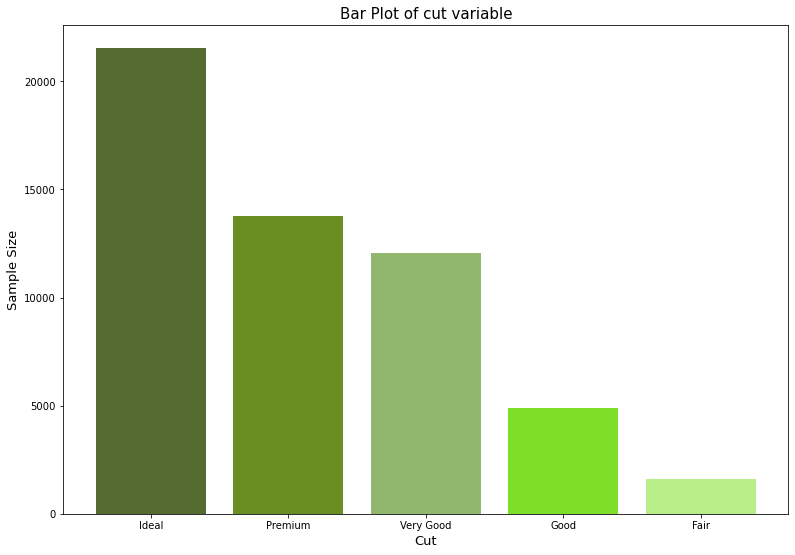

In [12]:
# Displaying a bar plot of 'cut' variable
plt.figure(figsize=(13,9))
plt.bar(x,height,color=['#556B2F','#6B8E23','#90B76D','#7EDE28','#B8ED88'])
plt.xlabel('Cut',size='13')
plt.ylabel('Sample Size',size='13')
plt.title('Bar Plot of cut variable',size='15')
plt.show()

<font color = 'green'> Correct : 2.5 points </font> 

#### Solution 4.5

In [13]:
# Getting a Series object of the 'carat' variable
carat = diamonds_df['carat']

# Displaying the 'carat' series variable
carat

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

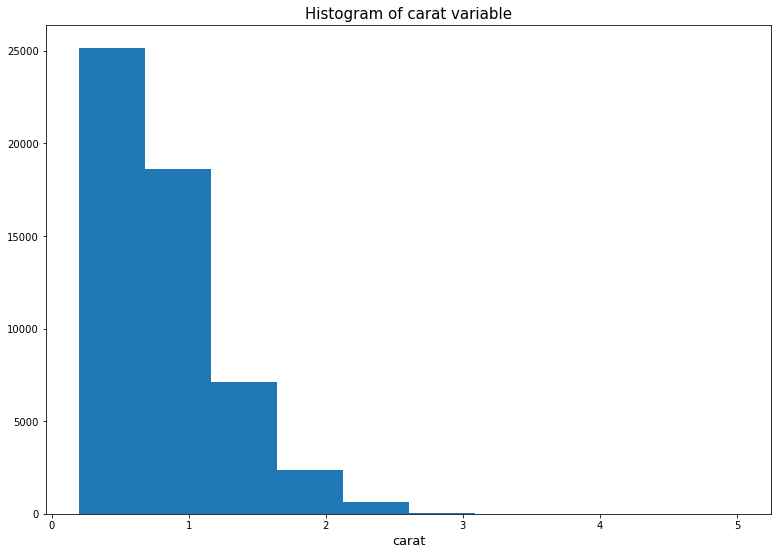

In [14]:
# Displaying a histogram of 'carat' variable 
plt.figure(figsize=(13,9))
plt.hist(carat,bins=None)
plt.xlabel('carat',size='13')
plt.title('Histogram of carat variable',size='15')
plt.show()

<font color = 'green'> Correct : 2 points </font> 

#### Solution 4.6

In [15]:
# Getting a Series object of the 'price' variable

price = diamonds_df['price']

# Displaying the 'price' series variable

price

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

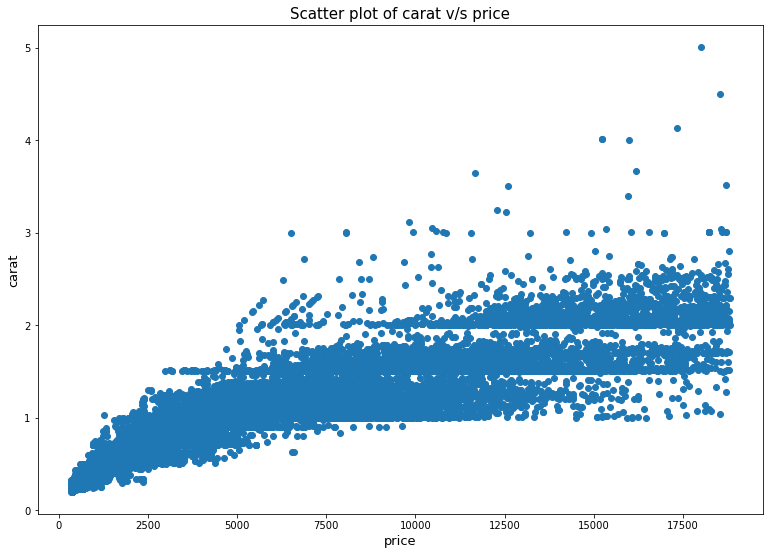

In [16]:
# Displaying a scatter plot of 'carat' variable (on Y-axis) v/s 'price' variable (on X-axis)
plt.figure(figsize=(13,9))
plt.scatter(price,carat)
plt.xlabel('price',size='13')
plt.ylabel('carat',size='13')
plt.title('Scatter plot of carat v/s price',size='15')
plt.show()

<font color = 'green'> Correct : 2 points </font> 

#### Solution 4.7

In [17]:
# Calculating the correlation coefficient between 'carat' and 'price' variables.
print(f'The correlation between \'carat\' and \'price\' variables is {carat.corr(price)}')

The correlation between 'carat' and 'price' variables is 0.921591301193476


<font color = 'green'> Correct : 1 point </font>

### Problem 5 (4 points)

We have a collection of m documents.

Let us say we would like to compare two documents x and y using their document term vectors. 

Let tf_ij be the frequency of the ith word (term) in the jth document

1. Let the vocabulary size (the dimensionality of the vectors) be n. What is a good measure of similarity for this purpose ? Write the formula for it in terms of tf_ij.

2. Consider the variable transformation given by idf_ij = tf_ij * log(m/df_i), where df_i is the document frequency, i.e. the number of documents in which the ith term occurs. The transformed variable idf_ij is called the inverse document frequency. What are the advantages of using this transformed variable instead of the original in the similarity computation ?

#### References:
Lecture Slides

### Solution

#### Solution 5.1

A good measure for similarity of the document term vectors would be cosine similarity. The reason behind this is that in cosine similarity, we divide the document vectors by their magnitude to reduce them to unit norm. This is specifically useful when the same words are present in both documents but in one of them, they are present in a larger number/scale.

Let the term frequency vectors of documents x and y be as follows <br>
tf$_{j(x)}$ = (tf$_{1j(x)}$,tf$_{2j(x)}$,tf$_{3j(x)}$,...........,tf$_{nj(x)}$) <br>
tf$_{j(y)}$ = (tf$_{1j(y)}$,tf$_{2j(y)}$,tf$_{3j(y)}$,...........,tf$_{nj(y)}$) <br>
where tf$_{1j(x)}$ indicates how many times the first vocabulary word occurs in the document x and so on

Cosine similarity is given as below

$\large cos(x,y) = cos(\theta) = \frac{tf_{j(x)} \cdot tf_{j(y)}}{\left \|tf_{j(x)}  \right \| \left \|tf_{j(y)}  \right \|}$
where $\theta\$ is the angle between the two term frequency vectors <br>

$\large cos(\theta) = \frac{tf_{1j(x)}\cdot tf_{1j(y)} + tf_{2j(x)}\cdot tf_{2j(y)} + ... + tf_{nj(x)}\cdot tf_{nj(y)}}{\sqrt{{tf_{1j(x)}^{2}+tf_{2j(x)}^{2}+....+tf_{nj(x)}^{2}}}\cdot \sqrt{{tf_{1j(y)}^{2}+tf_{2j(y)}^{2}+....+tf_{nj(y)}^{2}}}}$

$\large cos(\theta) = \frac{\sum_{i=1}^{n} tf_{ij(x)}\cdot tf_{ij(y)}}{\sqrt{\sum_{i=1}^{n} tf_{ij(x)}^{2}} \sqrt{\sum_{i=1}^{n} tf_{ij(y)}^{2}}}$

<font color = 'green'> Correct : 2 points </font> 

#### Solution 5.2

The variable transformation idf_ij = tf_ij * log(m/df_i) where df_i is the document frequency and m is the number of documents is called inverse document frequency. 

Assuming two scenarios where the terms are selected from a vocabulary.

(i) term(i)='cricket' , m=5 , df_i=2 : This means that there are 5 documents and the term 'cricket' appears in only two of them. When we apply the factor log(m/df_i) = log(5/2) = log(2.5) = 0.3979. This means that we have put more emphasis on this term.<br><br>
(ii) term(i)='to' , m=5 , df_i=5 : This means that out of the 5 documents, the term 'to' appears in all five of them. When we apply the factor log(m/df_i) = log(5/5) = log(1) = 0. This means that we have put very less emphasis on this term.

From the above two scenarios, the advantage of using the inverse document frequency transformation is that there are few terms like 'to','and','for' etc which occur a lot of times in several documents. These words do not tell us anything specific about the document extract. But when the terms like 'cricket' occur in two documents for eg., this inverse document frequency transformation might help us to calculate cosine similarity and tell us something specific about the document or something important about the topic or domain (In this scenario (i), there is a possibility that one document is a cricket scorecard and the other is a random sports magazine) 


<font color = 'green'> Correct : 2 points </font> 

### Problem 6 (6 points)

Write Python functions to compute the Hamming (L1) distance, SMC and Jaccard similarity coefficient between two binary vectors. Use them to these proximity measures between the following vectors:

x = 1010101010101 

y = 1000100010001

#### References:
Lecture Slides

### Solution

In [18]:
# Function for computing hamming distance
def compute_Hamming_Distance(str1,str2):
    
    # Initializing Hamming distance to 0
    dist = 0
    
    # Iterate over both strings and if they differ in a particular bit, increment the distance measure.
    for i in range(len(str1)):
        if str1[i]!=str2[i]:
            dist+=1
    
    # Return the Hamming distance
    return dist

# Function for computing simple matching coefficient
def compute_SMC(str1,str2):
    
    # Initialize the simple matching coefficient
    coeff = 0
    
    # Finding the number of matches
    for i in range(len(str1)):
        if str1[i] == '0' and str2[i] == '0' or str1[i] == '1' and str2[i] == '1':
            coeff+=1
    
    # Return the SMC value 
    return coeff/len(str1)

# Function for computing Jaccard coefficient.
def compute_JC(str1,str2):
    
    # Initializing the 1-1 and non 0-0 matches
    f11 = f01 = f10 = 0
    
    # Calculating the number of 1-1 and non 0-0 matches
    for i in range(len(str1)):
        if str1[i] == '0':
            if str2[i] == '1':
                f01 += 1
        else:
            if str2[i] == '1':
                f11 += 1
            else:
                f10 += 1
                
    # Return the JC value            
    return f11/(f11+f01+f10)
    
x,y = '1010101010101','1000100010001'

print(f'The Hamming (L1) distance between {x} and {y} is {compute_Hamming_Distance(x,y)}')
print(f'The Simple Matching Coefficient between {x} and {y} is {compute_SMC(x,y)}')
print(f'The Jaccard Coefficient between {x} and {y} is {compute_JC(x,y)}')

The Hamming (L1) distance between 1010101010101 and 1000100010001 is 3
The Simple Matching Coefficient between 1010101010101 and 1000100010001 is 0.7692307692307693
The Jaccard Coefficient between 1010101010101 and 1000100010001 is 0.5714285714285714


<font color = 'green'> Correct : 6 points </font> 

### Problem 7 (6 points)

Calculate the indicated similarity or distance measures of the vectors show below (you can do this by hand or by writing code, but please show the computation either way):

x = (1,1,1,1) and y = (3,3,3,3) : cosine, correlation, Euclidean

x = (0,1,0,1,0,1) and y = (1,0,1,0,1,0) : cosine, correlation, Euclidean, Jaccard 

x = (1,1,0,1,0,1) and y = (1,1,1,0,0,1) : cosine, correlation, Lmax, Jaccard

#### References:
Lecture Slides

### Solution

In [19]:
def compute_cosine(vector1,vector2):
    dot_product = 0
    
    # Calculating the dot product between two vectors
    dot_product = sum([vector1[i] * vector2[i] for i in range(len(vector1))])
    
    # Calculating the magnitudes of the two vectors
    vector1_norm = (sum([vector1[i] ** 2 for i in range((len(vector1)))])) ** 0.5
                    
    vector2_norm = (sum([vector2[i] ** 2 for i in range((len(vector2)))])) ** 0.5
    
    # Return the cosine similarity measure
    return dot_product / (vector1_norm * vector2_norm)    

In [20]:
def compute_Euclidean(vector1,vector2):
    
    # Calculating the distance between the vectors in all dimensions, then squaring them, adding them and taking the square root
    return sum([(vector2[i]-vector1[i]) ** 2 for i in range(len(vector1))]) ** 0.5

In [21]:
def compute_JC(vector1,vector2):
    
    # Initializing the 1-1 and non 0-0 matches
    f11 = f01 = f10 = 0
    
    # Calculating the number of 1-1 and non 0-0 matches
    for i in range(len(vector1)):
        if vector1[i] == 0:
            if vector2[i] == 1:
                f01 += 1
        else:
            if vector2[i] == 1:
                f11 += 1
            else:
                f10 += 1
                
    # Return the JC value            
    return f11/(f11+f01+f10)

In [22]:
def compute_Lmax(vector1,vector2):
    
    # Return the maximum difference between any component of the vectors 
    return max([abs(vector2[i]-vector1[i]) for i in range(len(vector1))])

In [23]:
def compute_corr(vector1,vector2):
    
    # Number of dimensions of the vector
    n = len(vector1)
    
    # Calculating the mean values of both the vectors.
    vector1_mean = sum(vector1)/len(vector1)
    vector2_mean = sum(vector2)/len(vector2)
    
    # Calculating the covariance of the two vectors
    covariance_vector1_vector2 = sum([(vector1[i]-vector1_mean)*(vector2[i]-vector2_mean) for i in range(n)])/(n-1)
    
    # Calculating the standard deviation of both vectors
    sigma_vector1 = (sum([(vector1[i]-vector1_mean) ** 2 for i in range(n)])/(n-1)) ** 0.5
    sigma_vector2 = (sum([(vector2[i]-vector2_mean) ** 2 for i in range(n)])/(n-1)) ** 0.5
    
    # Returning the correlation coefficient
    return covariance_vector1_vector2 / (sigma_vector1 * sigma_vector2)


In [24]:
x,y = (1,1,1,1),(3,3,3,3)
print(f'The Cosine Similarity between {x} and {y} is {compute_cosine(x,y)}')
try:
    print(f'The correlation between {x} and {y} is {compute_corr(x,y)}')
except:
    print(f'The correlation between {x} and {y} is undefined')
print(f'The Euclidean distance between {x} and {y} is {compute_Euclidean(x,y)}')

The Cosine Similarity between (1, 1, 1, 1) and (3, 3, 3, 3) is 1.0
The correlation between (1, 1, 1, 1) and (3, 3, 3, 3) is undefined
The Euclidean distance between (1, 1, 1, 1) and (3, 3, 3, 3) is 4.0


In [25]:
x,y= (0,1,0,1,0,1),(1,0,1,0,1,0)
print(f'The Cosine Similarity between {x} and {y} is {compute_cosine(x,y)}')
print(f'The correlation between {x} and {y} is {compute_corr(x,y):.6f}')
print(f'The Euclidean distance between {x} and {y} is {compute_Euclidean(x,y)}')
print(f'The Jaccard coefficient between {x} and {y} is {compute_JC(x,y)}')

The Cosine Similarity between (0, 1, 0, 1, 0, 1) and (1, 0, 1, 0, 1, 0) is 0.0
The correlation between (0, 1, 0, 1, 0, 1) and (1, 0, 1, 0, 1, 0) is -1.000000
The Euclidean distance between (0, 1, 0, 1, 0, 1) and (1, 0, 1, 0, 1, 0) is 2.449489742783178
The Jaccard coefficient between (0, 1, 0, 1, 0, 1) and (1, 0, 1, 0, 1, 0) is 0.0


In [26]:
x,y = (1,1,0,1,0,1),(1,1,1,0,0,1)
print(f'The Cosine Similarity between {x} and {y} is {compute_cosine(x,y)}')
print(f'The correlation between {x} and {y} is {compute_corr(x,y)}')
print(f'The Lmax distance between {x} and {y} is {compute_Lmax(x,y)}')
print(f'The Jaccard coefficient between {x} and {y} is {compute_JC(x,y)}')

The Cosine Similarity between (1, 1, 0, 1, 0, 1) and (1, 1, 1, 0, 0, 1) is 0.75
The correlation between (1, 1, 0, 1, 0, 1) and (1, 1, 1, 0, 0, 1) is 0.25
The Lmax distance between (1, 1, 0, 1, 0, 1) and (1, 1, 1, 0, 0, 1) is 1
The Jaccard coefficient between (1, 1, 0, 1, 0, 1) and (1, 1, 1, 0, 0, 1) is 0.6


<font color = 'green'> Correct : 6 points </font> 

### Submission instructions

1. Your assignment should be completed by filling in the empty solution cells in this Jupyter notebook file (.ipynb). Feel free to add more cells as needed.

2. Please comment your code using either markdown or #comments and use meaningful variable names to make it as readable and intelligible as possible.

3. Write your code in the form of functions. For example: 

    def my_code ():

          #Write code here
      
          return "The return value"
          

4. If the problem is to find the value of 'x', printing 'x = (your answer)' will help us identify if your code worked.


5. For code that refers to local data files downloaded from the internet, please keep the file path simple (e.g. ~/downloads/datafilename) so that it works on our copy of the dataset. Please do not modify either the filename or the file contents in any way.

6. Solution to problems that do not require any coding can be typed up in their own cells using markdown.
    
7. Unless there are legitimate circumstances, late assignments will not be accepted.

8. All assignments are individual.

9. All the sources used for problem solution must be acknowledged, e.g. web sites, books, research papers, etc.

10. Academic integrity is taken seriously; for detailed information see the RIT Honor Code and with RIT's Academic Integrity Policy.

<font color = 'green'> Total Points : 51 points </font>  